In [8]:
#pip install StandardScaler
# pip install scikit-learn
#%pip install sklearn_ensemble
#%pip install sklearn.metrics 
# %pip install scikit-learn
#%pip install sklearn.cluster
#%pip install sklearn.decomposition
#%pip install features
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler


## Linear Regression

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"D:\Internship\Spangles info tech\world_population_data.csv")
df.fillna(df.mean(numeric_only=True), inplace=True)

X = df[["Fert. Rate", "Urban Pop %"]]
y = df["2024 population"]

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Displaying the coefficients of the linear regression model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("Coefficients of the Linear Regression Model:")
print(coefficients) 

# Use Plotly for interactive chart with hover data
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=y_test.values[:50],
    mode='lines+markers',
    name='Actual',
    marker=dict(symbol='circle'),
    hovertext=[f"Actual: {val}" for val in y_test.values[:50]],
    hoverinfo='text+y'
))
fig.add_trace(go.Scatter(
    y=y_pred[:50],
    mode='lines+markers',
    name='Predicted',
    marker=dict(symbol='x'),
    hovertext=[f"Predicted: {val:.0f}" for val in y_pred[:50]],
    hoverinfo='text+y'
))
fig.update_layout(
    title="Linear Regression: Actual vs Predicted",
    xaxis_title="Sample Index",
    yaxis_title="2024 Population",
    legend=dict(x=0, y=1),
    hovermode='x unified'
)
fig.show()


Coefficients of the Linear Regression Model:
                   Coefficient
Fert. Rate       -6.684431e+05
Urban Pop %_0%   -4.293107e+07
Urban Pop %_100% -4.380932e+07
Urban Pop %_11%  -3.963709e-06
Urban Pop %_12%  -3.206808e+07
...                        ...
Urban Pop %_96%  -4.352859e+07
Urban Pop %_97%  -4.053198e+07
Urban Pop %_98%  -4.336615e+07
Urban Pop %_99%  -4.274419e+07
Urban Pop %_N.A. -3.941945e+07

[85 rows x 1 columns]


 Linear Regression – Actual vs Predicted

* Goal: Predict 2024 population based on Fertility Rate and Urban Population %.

* Method: Fits a straight line (linear model).

* Usefulness: Works well when relationships are simple and linear.

* Chart Insight: Shows how closely predicted values align with actual values — deviations indicate prediction error.

In [10]:


fig = px.scatter(
    df,
    x="Fert. Rate",
    y="2024 population",
    color="continent",
    hover_name="country",
    title="Fertility Rate vs Population by Country"
)
fig.show()

## Random Forest

In [11]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=y_test.values[:50],
    mode='lines+markers',
    name='Actual',
    marker=dict(symbol='circle'),
    hovertext=[f"Actual: {val}" for val in y_test.values[:50]],
    hoverinfo='text+y'
))
fig.add_trace(go.Scatter(
    y=y_pred_rf[:50],
    mode='lines+markers',
    name='Random Forest Predicted',
    marker=dict(symbol='x'),
    hovertext=[f"Predicted: {val:.0f}" for val in y_pred_rf[:50]],
    hoverinfo='text+y'
))
fig.update_layout(
    title="Random Forest: Actual vs Predicted",
    xaxis_title="Sample Index",
    yaxis_title="2024 Population",
    legend=dict(x=0, y=1),
    hovermode='x unified'
)
from sklearn.ensemble import RandomForestRegressor
    
    # Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

fig.show()


Random Forest – Actual vs Predicted

* Goal: Same as above — predict population, but more accurately.

* Method: Uses multiple decision trees and averages the results.

* Usefulness: Handles complex, non-linear data much better.

* Chart Insight: Better prediction accuracy compared to linear regression; visually tighter match between actual and predicted lines.

## K-Means Clustering – Unsupervised Grouping of Countries

In [12]:
# Replace % and convert to float, safely handling 'N.A.' and other junk
df["Urban Pop %"] = pd.to_numeric(df["Urban Pop %"].str.replace("%", "", regex=False), errors='coerce')
df["growth rate"] = pd.to_numeric(df["growth rate"].str.replace("%", "", regex=False), errors='coerce')
df["Fert. Rate"] = pd.to_numeric(df["Fert. Rate"], errors='coerce')  # Just to be safe


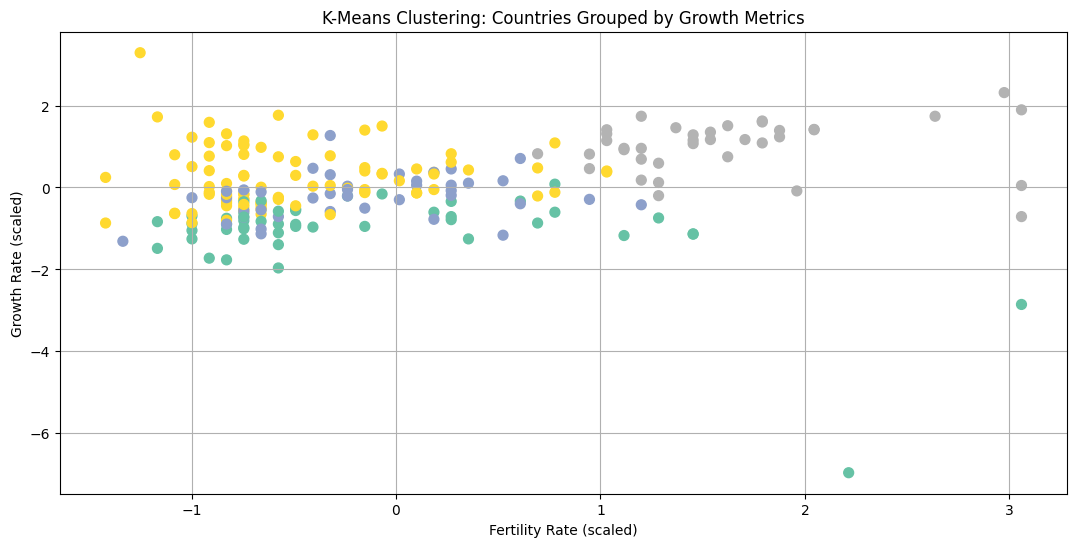

In [13]:
# Drop any rows with missing values in those features
features = df[["Fert. Rate", "growth rate", "Urban Pop %"]].dropna()

# Standardize and Cluster
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled)

# Plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
plt.scatter(scaled[:, 0], scaled[:, 1], c=clusters, cmap='Set2', s=50)
plt.title("K-Means Clustering: Countries Grouped by Growth Metrics")
plt.xlabel("Fertility Rate (scaled)")
plt.ylabel("Growth Rate (scaled)")
plt.grid(True)
plt.show()


K-Means Clustering – Country Groups

* Goal: Group countries based on similar demographic features.

* Method: Unsupervised clustering using Fertility Rate, Growth Rate, and Urban Population %.

* Usefulness: Reveals natural groupings in data without needing labeled output.

* Chart Insight: Countries are colored by cluster; helps spot which countries share similar growth traits.

* Features like fertility rate, urban pop %, and growth rate are scaled (StandardScaler makes them mean = 0, std = 1)

* K-Means assigns each country to 1 of 4 clusters

## XGBRegressor

In [14]:
%pip install xgboost

from xgboost import XGBRegressor
import plotly.graph_objects as go

# Train XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=y_test.values[:50],
    mode='lines+markers',
    name='Actual',
    marker=dict(symbol='circle'),
    hovertext=[f"Actual: {val}" for val in y_test.values[:50]],
    hoverinfo='text+y'
))
fig.add_trace(go.Scatter(
    y=y_pred_xgb[:50],
    mode='lines+markers',
    name='XGBoost Predicted',
    marker=dict(symbol='x'),
    hovertext=[f"Predicted: {val:.0f}" for val in y_pred_xgb[:50]],
    hoverinfo='text+y'
))
fig.update_layout(
    title="XGBoost: Actual vs Predicted",
    xaxis_title="Sample Index",
    yaxis_title="2024 Population",
    legend=dict(x=0, y=1),
    hovermode='x unified'
)
fig.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBoost – Actual vs Predicted

* Goal: Ultra-accurate population prediction.

* Method: Boosting technique that improves prediction by learning from previous mistakes.

* Usefulness: Highly effective for structured/tabular data with lots of subtle patterns.

* Chart Insight: Best alignment between actual and predicted values; minimal error if tuned well.

## PCA (Principal Component Analysis)

C:\Users\Naveen sakthi\AppData\Local\Temp\ipykernel_14484\816595867.py:11: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



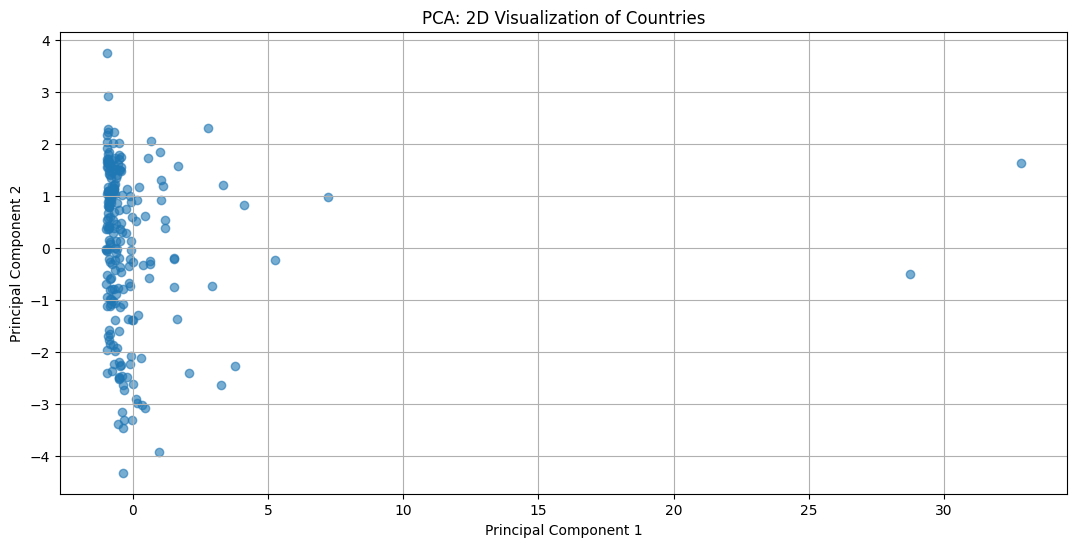

In [15]:
from sklearn.decomposition import PCA

df_clean = df.select_dtypes(include='number').dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(13, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, cmap="Spectral")
plt.title("PCA: 2D Visualization of Countries")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


PCA (Principal Component Analysis) – 2D View

* Goal: Visualize high-dimensional data in two dimensions.

* Method: Dimensionality reduction using principal components.

* Usefulness: Makes complex data easier to understand and visualize.

* Chart Insight: Helps spot clusters, trends, and outliers across all numeric features — even without knowing exact values.

## Chart Type and Type

| Chart         | Task Type     | Purpose                   | Visual Shows                     |
| ------------- | ------------- | ------------------------- | -------------------------------- |
| Linear Reg    | Regression    | Predict population        | Basic accuracy comparison        |
| Random Forest | Regression    | Better prediction         | Improved accuracy                |
| K-Means       | Clustering    | Group similar countries   | Cluster grouping                 |
| XGBoost       | Regression    | High-accuracy prediction  | Best fit for complex data        |
| PCA           | Visualization | Simplify + visualize data | 2D structure of country profiles |
